## Best buy products API
https://developer.bestbuy.com/documentation/products-api

In [12]:
import urllib2
import json
import getpass
import pandas as pd

### Use the getpass() function to hide the key

In [13]:
KEY = getpass.getpass()

········


### Get the data through API

In [139]:
#get notebook available online information and dump it on file
source_url = 'http://api.remix.bestbuy.com'
QUERY="/v1/products(name=laptop*&onlineAvailability=true)"
OPTS="?sort=name.desc&show=all&format=json"  #format as json

url = source_url + QUERY + OPTS + '&apiKey=' + KEY

r = urllib2.urlopen(url)

data = json.load(r)
#dump to a file
notebook = open("bb_notebook.json", "wb") 
json.dump(data, notebook)

#close the file
notebook.close() 

### Explore the data
From the best buy API documentation, we know the JSON data is a dictionary and "products" is one of the keys of the data.
"Products" value is a list which consists of a bunch of dictionaries.

In [140]:
#Explore the first element of the list
products = data['products']
products[0]

{u'accessories': [],
 u'accessoriesImage': None,
 u'active': True,
 u'activeUpdateDate': u'2016-04-25T13:35:16',
 u'addToCartUrl': u'http://www.bestbuy.com/site/olspage.jsp?id=pcmcat152200050035&type=category&cmp=RMX&ky=2f88QjPPGSkR4sZjA49ofFrY2FzBM4eHR&qvsids=4784300',
 u'affiliateAddToCartUrl': None,
 u'affiliateUrl': None,
 u'alternateViewsImage': None,
 u'angleImage': None,
 u'backViewImage': None,
 u'bestBuyItemId': u'',
 u'bestSellingRank': None,
 u'bundledIn': [],
 u'buybackPlans': [],
 u'carrierModelNumber': None,
 u'carrierPlans': [],
 u'categoryPath': [{u'id': u'cat00000', u'name': u'Best Buy'},
  {u'id': u'abcat0800000', u'name': u'Cell Phones'},
  {u'id': u'abcat0811002', u'name': u'Cell Phone Accessories'},
  {u'id': u'abcat0811004', u'name': u'Cell Phone Batteries & Power'},
  {u'id': u'pcmcat326000050010', u'name': u'Portable Chargers/Power Packs'}],
 u'class': u'MOBILE COMP. ACCESS.',
 u'classId': 124,
 u'color': u'Gray',
 u'condition': u'New',
 u'customerReviewAverage'

In [141]:
#Check the keys 
products[0].keys()

[u'frequentlyPurchasedWith',
 u'fulfilledBy',
 u'releaseDate',
 u'shippingRestrictions',
 u'rightViewImage',
 u'salesRankMediumTerm',
 u'friendsAndFamilyPickup',
 u'warrantyLabor',
 u'leftViewImage',
 u'subclassId',
 u'sku',
 u'customerReviewCount',
 u'dollarSavings',
 u'source',
 u'offers',
 u'tradeInValue',
 u'inStoreAvailabilityTextHtml',
 u'earlyTerminationFees',
 u'preowned',
 u'longDescriptionHtml',
 u'largeImage',
 u'format',
 u'longDescription',
 u'onlineAvailabilityTextHtml',
 u'department',
 u'sellerId',
 u'condition',
 u'secondaryMarket',
 u'name',
 u'homeDelivery',
 u'mobileUrl',
 u'percentSavings',
 u'upc',
 u'modelNumber',
 u'weight',
 u'planPrice',
 u'lowPriceGuarantee',
 u'affiliateUrl',
 u'includedItemList',
 u'listingId',
 u'subclass',
 u'inStorePickup',
 u'salesRankLongTerm',
 u'linkShareAffiliateUrl',
 u'new',
 u'technologyCode',
 u'priceUpdateDate',
 u'inStoreAvailability',
 u'remoteControlImage',
 u'inStoreAvailabilityText',
 u'active',
 u'manufacturer',
 u'onSale

### Build the dataframe

In [255]:
#Get a subset of keys - interested columns
cols = ['sku', 'customerReviewAverage', 'customerReviewCount', 'name', 'condition', 'manufactureer','shippingCost', 
         'regularPrice', 'salePrice', 'description']

In [256]:
# Method 1 - to compare with the method 2, use the time function
import time

print time.time()

df = pd.DataFrame()

ln =len(products)
for i in range(0,ln):
    dit = {key:value for key, value in products[i].items() if key in cols}
    df = df.append(pd.DataFrame(dit, columns=cols,index=[i]))
    
print time.time()
df.head(2)  

1463776520.32
1463776520.39


,sku,customerReviewAverage,customerReviewCount,name,condition,manufactureer,shippingCost,regularPrice,salePrice,description
0,4784300,None,None,Zolt - Laptop Charger Plus - Gray,New,NaN,0.0,99.99,99.99,None
1,5049649,1.0,1,Women In Business - Bonita Classica Laptop Cas...,New,NaN,0.0,69.99,69.99,None


In [257]:
# Method 2
print time.time()
data_frames = {}

ln =len(products)
for i in range(0,ln):
    dit = {key:value for key, value in products[i].items() if key in cols}
    data_frames[i] = pd.DataFrame(dit, columns=cols, index=[i])

dt = pd.concat(data_frames, ignore_index=True)

print time.time()
dt.head(2)

1463776522.25
1463776522.29


,sku,customerReviewAverage,customerReviewCount,name,condition,manufactureer,shippingCost,regularPrice,salePrice,description
0,4784300,None,None,Zolt - Laptop Charger Plus - Gray,New,NaN,0.0,99.99,99.99,None
1,5049649,1.0,1,Women In Business - Bonita Classica Laptop Cas...,New,NaN,0.0,69.99,69.99,None


#### Get into the deep
As we can see that the the key "shipping" has a list value. how to get all this infomation out?
   u'shipping': [{u'ground': 0.0,
   u'nextDay': 19.98,
   u'secondDay': 11.98,
   u'vendorDelivery': u''}]
Suppose we want to get the sku, name , shipping information. If we use the same method, data in shipping column will 
not show nicely

In [258]:
cols = ['sku', 'name', 'shipping']

dt = pd.DataFrame()

ln =len(products)
for i in range(0,ln):
    dit = {key:value for key, value in products[i].items() if key in cols}
    products[i]
    dt = dt.append(pd.DataFrame(dit, columns=cols,index=[i]))
dt.head(2)

,sku,name,shipping
0,4784300,Zolt - Laptop Charger Plus - Gray,"{u'vendorDelivery': u'', u'secondDay': 11.98, ..."
1,5049649,Women In Business - Bonita Classica Laptop Cas...,"{u'vendorDelivery': u'', u'secondDay': 14.95, ..."


In [259]:
#To work around this, we have to separate it into two parts.
cols = ['sku', 'name']
col = 'shipping'

dt = pd.DataFrame()

ln =len(products)
for i in range(0,ln):
    dit1 = {key:value for key, value in products[i].items() if key in cols}
    #it is important to use the same index
    dit1 = pd.DataFrame(dit1, columns=cols,index=[i])
    dit2 = pd.DataFrame.from_records(products[i][col],index=[i])
    dit = pd.concat([dit1, dit2], axis=1)
    dt = dt.append(dit)
dt.head()

,sku,name,ground,nextDay,secondDay,vendorDelivery
0,4784300,Zolt - Laptop Charger Plus - Gray,0.0,19.98,11.98,
1,5049649,Women In Business - Bonita Classica Laptop Cas...,0.0,25.95,14.95,
2,6330355,WIB - Francine Collection Park Avenue Laptop C...,0.0,25.95,14.95,
3,6330346,WIB - Francine Collection Park Avenue Laptop C...,0.0,25.95,14.95,
4,6330391,WIB - Francine Collection Park Avenue Laptop C...,0.0,25.95,14.95,


In [260]:
#rename the columns
cols = ['sku', 'name', 'shipping.ground','shipping.nextDay','shipping.secondDay','shipping.vendorDelivery']
dt.columns = cols
dt.head(2)

,sku,name,shipping.ground,shipping.nextDay,shipping.secondDay,shipping.vendorDelivery
0,4784300,Zolt - Laptop Charger Plus - Gray,0.0,19.98,11.98,
1,5049649,Women In Business - Bonita Classica Laptop Cas...,0.0,25.95,14.95,


### Analyze the data

In [261]:
# get the sku, name, regularPrice, and salePrice info of paroducts with at least 100 customer reviews and average review 
# above 4 (include 4). 
df[(df.customerReviewAverage >= 4) & (df.customerReviewCount > 100)].ix[ : ,['sku', 'name', 'regularPrice','salePrice']]

,sku,name,regularPrice,salePrice
5,9314108,WD - Mainstream 500GB Internal Serial ATA Hard...,49.99,49.99
6,9312128,WD - Mainstream 320GB Internal Serial ATA Hard...,49.99,49.99
7,9314126,WD - Mainstream 1TB Internal Serial ATA Hard D...,69.99,69.99


In [262]:
# get all the info including shipping price of product (sku = 9314108)
dt_merge = pd.merge(dt, df, on='sku', how='inner')
dt_merge[dt_merge.sku==9314108]

,sku,name_x,shipping.ground,shipping.nextDay,shipping.secondDay,shipping.vendorDelivery,customerReviewAverage,customerReviewCount,name_y,condition,manufactureer,shippingCost,regularPrice,salePrice,description
5,9314108,WD - Mainstream 500GB Internal Serial ATA Hard...,0.0,19.98,11.98,,4.6,853,WD - Mainstream 500GB Internal Serial ATA Hard...,New,NaN,0.0,49.99,49.99,None


         regularPrice  salePrice
sku                             
4784300         99.99      99.99
5049649         69.99      69.99


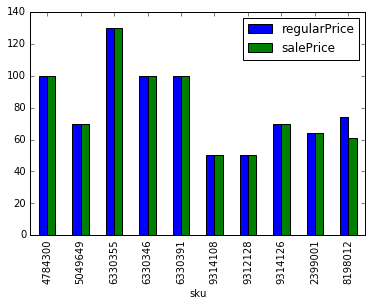

In [263]:
# plot the regularPrice and salePrice
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

d = df[['sku','regularPrice', 'salePrice']]
d = d.set_index('sku')

d.plot.bar()

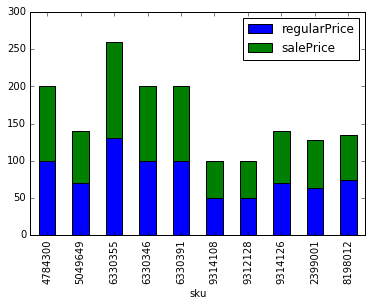

In [264]:
d.plot.bar(stacked=True)

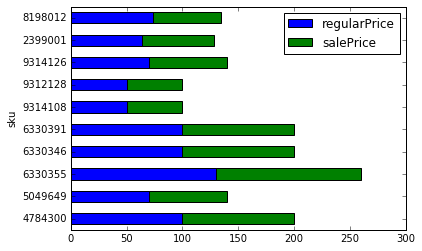

In [265]:
d.plot.barh(stacked=True)

### Summary


In this post, I have demonstrated how to get the data through API. I have also shown how to parse the json file with json package and how to convert it into a workable pandas dataframe. Please note that if you work on large volume of data, you may consider to use ijson package as mentioned by Vik's post (see below). This package might be slower than directly reading the whole file in, but it avoid choke when the data can’t fit in memory. 

### Further reading

In [266]:
# https://developer.bestbuy.com/tutorials
# https://www.dataquest.io/blog/python-json-tutorial/